In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [36]:
df = pd.read_csv('bank_churn_model.csv')
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
4093,4094,15798470,Scannell,764,Spain,Female,48,1,75990.97,1,1,0,158323.81,1
6812,6813,15605059,Mackie,576,Germany,Male,63,3,148843.56,1,1,0,69414.13,1
4079,4080,15694601,Ankudinov,583,France,Female,31,4,158978.79,1,1,0,12538.92,0
1133,1134,15706899,Ma,559,France,Male,34,4,0.00,2,1,1,66721.98,0
6900,6901,15806922,Bergamaschi,674,Spain,Female,41,4,126605.14,1,1,1,166694.93,0


In [37]:
df.drop(['RowNumber','CustomerId'],axis='columns',inplace = True)
df.drop(['Surname'],axis='columns',inplace = True)

In [38]:
df.sample(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
4057,510,France,Female,26,6,136214.08,1,0,0,159742.33,0
6129,533,Germany,Male,43,4,80442.06,2,0,1,12537.42,0
8925,682,Germany,Male,32,2,105163.88,2,1,1,164170.46,0
3958,633,France,Male,43,5,0.00,2,1,1,48249.88,0
264,738,Spain,Male,31,9,79019.80,1,1,1,18606.23,0


In [39]:
df.Gender.replace({'Female':1,'Male':0},inplace=True)

In [40]:
df = pd.get_dummies(data = df,columns = ['Geography'])

In [41]:
columns_to_scale = []
for column in df:
    if len(df[column].unique())>2:
        columns_to_scale.append(column)
columns_to_scale

['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

In [42]:
from sklearn.preprocessing import MinMaxScaler
df[columns_to_scale] = MinMaxScaler().fit_transform(df[columns_to_scale])

In [43]:
df.sample(3)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
6561,0.190,1,0.405405,0.7,0.670737,0.000000,1,0,0.083179,1,0,1,0
7163,1.000,1,0.378378,0.3,0.000000,0.333333,1,1,0.939933,0,1,0,0
9586,0.392,1,0.027027,0.6,0.000000,0.000000,0,1,0.102496,0,1,0,0


In [44]:
from sklearn.model_selection import train_test_split as tts
X = df.drop('Exited',axis = 'columns')
y = df['Exited']

X_train,X_test,y_train,y_test = tts(X,y,test_size = 0.2, random_state = 5)
X_train.shape

(8000, 12)

In [45]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(20,input_shape = (12,),activation = 'relu'),
    keras.layers.Dense(1,activation = 'sigmoid')
])

model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

model.fit(X_train,y_train,epochs = 100)

Epoch 1/100
250/250 [==============================] - 1s 3ms/step - loss: 0.5457 - accuracy: 0.7629
Epoch 2/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4792 - accuracy: 0.7964
Epoch 3/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4644 - accuracy: 0.8027
Epoch 4/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4564 - accuracy: 0.8070
Epoch 5/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4495 - accuracy: 0.8081
Epoch 6/100
250/250 [==============================] - 1s 4ms/step - loss: 0.4432 - accuracy: 0.8109
Epoch 7/100
250/250 [==============================] - 1s 4ms/step - loss: 0.4381 - accuracy: 0.8140
Epoch 8/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4344 - accuracy: 0.8149
Epoch 9/100
250/250 [==============================] - 1s 4ms/step - loss: 0.4311 - accuracy: 0.8156
Epoch 10/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4278 - accura

250/250 [==============================] - 1s 4ms/step - loss: 0.3340 - accuracy: 0.8616
Epoch 82/100
250/250 [==============================] - 1s 4ms/step - loss: 0.3338 - accuracy: 0.8652
Epoch 83/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3344 - accuracy: 0.8640
Epoch 84/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3341 - accuracy: 0.8622
Epoch 85/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3339 - accuracy: 0.8648
Epoch 86/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3338 - accuracy: 0.8627
Epoch 87/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3341 - accuracy: 0.8630
Epoch 88/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3335 - accuracy: 0.8655
Epoch 89/100
250/250 [==============================] - 1s 4ms/step - loss: 0.3337 - accuracy: 0.8634
Epoch 90/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3335 - accuracy: 

In [46]:
yp = model.predict(X_test)

y_predict = []
for i in yp:
    if i<=0.5:
        y_predict.append(0)
    else: y_predict.append(1)
df.to_csv('new_customer.csv')

In [47]:
from sklearn.metrics import confusion_matrix,classification_report

print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1595
           1       0.69      0.51      0.58       405

    accuracy                           0.85      2000
   macro avg       0.79      0.72      0.75      2000
weighted avg       0.84      0.85      0.85      2000



Text(69.0, 0.5, 'Truth')

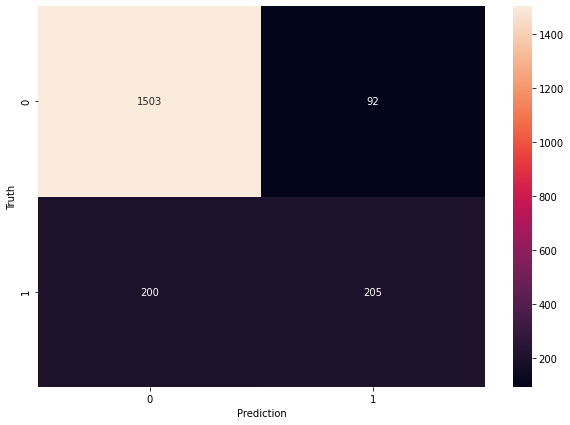

In [48]:
import seaborn as sn

cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predict)

plt.figure(figsize = (10,7))
sn.heatmap(cm,annot = True,fmt = 'd')
plt.xlabel('Prediction')
plt.ylabel('Truth')

In [49]:
from tensorflow_addons import losses

In [50]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix , classification_report

In [55]:
def ANN(X_train,X_test,y_train,y_test,loss,weights):
    model = keras.Sequential([
        keras.layers.Dense(12,input_dim=12,activation='relu'),
        keras.layers.Dense(7,activation='relu'),
        keras.layers.Dense(1,activation='sigmoid')
    ])
    
    model.compile(optimizer='adam',loss=loss,metrics=['accuracy'])
    
    if weights == -1:
        model.fit(X_train,y_train,epochs=100)
    else:
        model.fit(X_train,y_train,epochos=100,class_weight=weigts)
    
    print(model.evaluate(X_test,y_test))
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    print("Classification Report:")
    print(classification_report(y_test,y_preds))
    
    return y_preds

In [56]:
y_preds = ANN(X_train,X_test,y_train,y_test,'binary_crossentropy',-1)

Epoch 1/100
250/250 [==============================] - 1s 3ms/step - loss: 0.5276 - accuracy: 0.7958
Epoch 2/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4885 - accuracy: 0.7960
Epoch 3/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4746 - accuracy: 0.7960
Epoch 4/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4639 - accuracy: 0.7960
Epoch 5/100
250/250 [==============================] - 1s 4ms/step - loss: 0.4530 - accuracy: 0.7960
Epoch 6/100
250/250 [==============================] - 1s 4ms/step - loss: 0.4404 - accuracy: 0.7960
Epoch 7/100
250/250 [==============================] - 1s 4ms/step - loss: 0.4280 - accuracy: 0.7958
Epoch 8/100
250/250 [==============================] - 1s 4ms/step - loss: 0.4169 - accuracy: 0.8065
Epoch 9/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4043 - accuracy: 0.8179
Epoch 10/100
250/250 [==============================] - 1s 4ms/step - loss: 0.3920 - accura

250/250 [==============================] - 1s 4ms/step - loss: 0.3357 - accuracy: 0.8635
Epoch 81/100
250/250 [==============================] - 1s 4ms/step - loss: 0.3353 - accuracy: 0.8643
Epoch 82/100
250/250 [==============================] - 1s 4ms/step - loss: 0.3356 - accuracy: 0.8639
Epoch 83/100
250/250 [==============================] - 1s 4ms/step - loss: 0.3357 - accuracy: 0.8631
Epoch 84/100
250/250 [==============================] - 1s 4ms/step - loss: 0.3354 - accuracy: 0.8609
Epoch 85/100
250/250 [==============================] - 1s 4ms/step - loss: 0.3346 - accuracy: 0.8624
Epoch 86/100
250/250 [==============================] - 1s 4ms/step - loss: 0.3346 - accuracy: 0.8633
Epoch 87/100
250/250 [==============================] - 1s 4ms/step - loss: 0.3343 - accuracy: 0.8658
Epoch 88/100
250/250 [==============================] - 1s 4ms/step - loss: 0.3351 - accuracy: 0.8646
Epoch 89/100
250/250 [==============================] - 1s 4ms/step - loss: 0.3356 - accuracy: 

<h3>Under Sampling</h3>

In [57]:
df2 = df.copy()

In [58]:
count_class_0, count_class_1 = df2.Exited.value_counts()

df_class_0 = df2[df2.Exited == 0]
df_class_1 = df2[df2.Exited == 1]

In [59]:
df_class_0.shape,df_class_1.shape

((7963, 13), (2037, 13))

In [66]:
df_test_under = pd.concat([df_class_0.sample(count_class_1),df_class_1],axis='index')
print('Random Under-sampling')
print(df_test_under.Exited.value_counts())

Random Under-sampling
0    2037
1    2037
Name: Exited, dtype: int64


In [67]:
from sklearn.model_selection import train_test_split

In [68]:
X = df_test_under.drop('Exited',axis=1)
y = df_test_under.Exited

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=15,stratify=y)

In [69]:
y_train.value_counts(),y_test.value_counts()

(1    1630
 0    1629
 Name: Exited, dtype: int64,
 0    408
 1    407
 Name: Exited, dtype: int64)

In [71]:
y_preds = ANN(X_train,X_test,y_train,y_test,'binary_crossentropy',-1)

Epoch 1/100
102/102 [==============================] - 1s 4ms/step - loss: 0.7095 - accuracy: 0.5176
Epoch 2/100
102/102 [==============================] - 0s 4ms/step - loss: 0.6646 - accuracy: 0.6223
Epoch 3/100
102/102 [==============================] - 0s 4ms/step - loss: 0.6448 - accuracy: 0.6490
Epoch 4/100
102/102 [==============================] - 0s 4ms/step - loss: 0.6290 - accuracy: 0.6551
Epoch 5/100
102/102 [==============================] - 0s 4ms/step - loss: 0.6192 - accuracy: 0.6674
Epoch 6/100
102/102 [==============================] - 0s 5ms/step - loss: 0.6103 - accuracy: 0.6741
Epoch 7/100
102/102 [==============================] - 0s 5ms/step - loss: 0.6038 - accuracy: 0.6809
Epoch 8/100
102/102 [==============================] - 0s 5ms/step - loss: 0.5982 - accuracy: 0.6800
Epoch 9/100
102/102 [==============================] - 0s 4ms/step - loss: 0.5919 - accuracy: 0.6873
Epoch 10/100
102/102 [==============================] - 0s 5ms/step - loss: 0.5868 - accura

102/102 [==============================] - 0s 4ms/step - loss: 0.4614 - accuracy: 0.7806
Epoch 82/100
102/102 [==============================] - 0s 4ms/step - loss: 0.4602 - accuracy: 0.7769
Epoch 83/100
102/102 [==============================] - 0s 4ms/step - loss: 0.4608 - accuracy: 0.7757
Epoch 84/100
102/102 [==============================] - 0s 4ms/step - loss: 0.4611 - accuracy: 0.7824
Epoch 85/100
102/102 [==============================] - 0s 4ms/step - loss: 0.4613 - accuracy: 0.7763
Epoch 86/100
102/102 [==============================] - 0s 4ms/step - loss: 0.4610 - accuracy: 0.7772
Epoch 87/100
102/102 [==============================] - 0s 4ms/step - loss: 0.4605 - accuracy: 0.7797
Epoch 88/100
102/102 [==============================] - 0s 4ms/step - loss: 0.4609 - accuracy: 0.7778
Epoch 89/100
102/102 [==============================] - 0s 4ms/step - loss: 0.4605 - accuracy: 0.7794
Epoch 90/100
102/102 [==============================] - 0s 4ms/step - loss: 0.4615 - accuracy: 

<h3>Method 2: oversampling</h3>

In [72]:
count_class_0,count_class_1

(7963, 2037)

In [74]:
df_test_over = pd.concat([df_class_0,df_class_1.sample(count_class_0,replace=True)],axis=0)
print('Random Over-sampling')
print(df_test_over.Exited.value_counts())

Random Over-sampling
0    7963
1    7963
Name: Exited, dtype: int64


In [75]:
X = df_test_over.drop('Exited',axis=1)
y = df_test_over.Exited

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=15,stratify=y)

In [76]:
y_train.value_counts()

0    6370
1    6370
Name: Exited, dtype: int64

In [77]:
y_preds = ANN(X_train,X_test,y_train,y_test,'binary_crossentropy',-1)

Epoch 1/100
399/399 [==============================] - 2s 4ms/step - loss: 0.6604 - accuracy: 0.6145
Epoch 2/100
399/399 [==============================] - 2s 5ms/step - loss: 0.6186 - accuracy: 0.6658
Epoch 3/100
399/399 [==============================] - 2s 5ms/step - loss: 0.5930 - accuracy: 0.6911
Epoch 4/100
399/399 [==============================] - 2s 6ms/step - loss: 0.5727 - accuracy: 0.7042
Epoch 5/100
399/399 [==============================] - 2s 6ms/step - loss: 0.5629 - accuracy: 0.7122
Epoch 6/100
399/399 [==============================] - 2s 5ms/step - loss: 0.5539 - accuracy: 0.7167
Epoch 7/100
399/399 [==============================] - 2s 5ms/step - loss: 0.5357 - accuracy: 0.7330
Epoch 8/100
399/399 [==============================] - 3s 6ms/step - loss: 0.5091 - accuracy: 0.7498
Epoch 9/100
399/399 [==============================] - 2s 5ms/step - loss: 0.4910 - accuracy: 0.7606
Epoch 10/100
399/399 [==============================] - 2s 5ms/step - loss: 0.4821 - accura

399/399 [==============================] - 2s 5ms/step - loss: 0.4398 - accuracy: 0.7893
Epoch 82/100
399/399 [==============================] - 2s 5ms/step - loss: 0.4410 - accuracy: 0.7853
Epoch 83/100
399/399 [==============================] - 2s 5ms/step - loss: 0.4398 - accuracy: 0.7863
Epoch 84/100
399/399 [==============================] - 2s 5ms/step - loss: 0.4400 - accuracy: 0.7903
Epoch 85/100
399/399 [==============================] - 2s 5ms/step - loss: 0.4396 - accuracy: 0.7879
Epoch 86/100
399/399 [==============================] - 2s 6ms/step - loss: 0.4388 - accuracy: 0.7871
Epoch 87/100
399/399 [==============================] - 3s 7ms/step - loss: 0.4386 - accuracy: 0.7887
Epoch 88/100
399/399 [==============================] - 3s 7ms/step - loss: 0.4386 - accuracy: 0.7894
Epoch 89/100
399/399 [==============================] - 2s 6ms/step - loss: 0.4387 - accuracy: 0.7864
Epoch 90/100
399/399 [==============================] - 2s 6ms/step - loss: 0.4384 - accuracy: 

<h3>method 3: SMOTE </h3>

In [78]:
X = df2.drop('Exited',axis=1)
y = df2.Exited

In [80]:
!pip install imbalanced-learn

You should consider upgrading via the 'c:\users\user\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [81]:
y.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [84]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm,y_sm = smote.fit_resample(X,y)
y_sm.value_counts()

0    7963
1    7963
Name: Exited, dtype: int64

In [85]:
X_train,X_test,y_train,y_test = train_test_split(X_sm,y_sm,test_size=0.2,stratify=y_sm)

In [86]:
y_preds = ANN(X_train,X_test,y_train,y_test,'binary_crossentropy',-1)

Epoch 1/100
399/399 [==============================] - 17s 5ms/step - loss: 0.6669 - accuracy: 0.6082
Epoch 2/100
399/399 [==============================] - 2s 5ms/step - loss: 0.6057 - accuracy: 0.6824
Epoch 3/100
399/399 [==============================] - 2s 5ms/step - loss: 0.5699 - accuracy: 0.7104
Epoch 4/100
399/399 [==============================] - 2s 5ms/step - loss: 0.5504 - accuracy: 0.7241
Epoch 5/100
399/399 [==============================] - 2s 6ms/step - loss: 0.5381 - accuracy: 0.7311
Epoch 6/100
399/399 [==============================] - 2s 6ms/step - loss: 0.5271 - accuracy: 0.7392
Epoch 7/100
399/399 [==============================] - 2s 6ms/step - loss: 0.5148 - accuracy: 0.7478
Epoch 8/100
399/399 [==============================] - 2s 5ms/step - loss: 0.5024 - accuracy: 0.7534
Epoch 9/100
399/399 [==============================] - 2s 5ms/step - loss: 0.4921 - accuracy: 0.7596
Epoch 10/100
399/399 [==============================] - 2s 5ms/step - loss: 0.4835 - accur

399/399 [==============================] - 2s 5ms/step - loss: 0.4252 - accuracy: 0.7995
Epoch 82/100
399/399 [==============================] - 2s 5ms/step - loss: 0.4245 - accuracy: 0.7994
Epoch 83/100
399/399 [==============================] - 2s 5ms/step - loss: 0.4249 - accuracy: 0.7992
Epoch 84/100
399/399 [==============================] - 2s 6ms/step - loss: 0.4245 - accuracy: 0.7992
Epoch 85/100
399/399 [==============================] - 3s 6ms/step - loss: 0.4254 - accuracy: 0.7995
Epoch 86/100
399/399 [==============================] - 2s 5ms/step - loss: 0.4251 - accuracy: 0.7991
Epoch 87/100
399/399 [==============================] - 2s 5ms/step - loss: 0.4252 - accuracy: 0.7973
Epoch 88/100
399/399 [==============================] - 2s 5ms/step - loss: 0.4235 - accuracy: 0.8018
Epoch 89/100
399/399 [==============================] - 2s 6ms/step - loss: 0.4245 - accuracy: 0.7988
Epoch 90/100
399/399 [==============================] - 2s 5ms/step - loss: 0.4250 - accuracy: 

<h3> Method 4: Use of Ensemble with under sampling </h3>

In [87]:
X = df2.drop('Exited',axis=1)
y = df2.Exited

In [88]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y)

In [91]:
y.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [90]:
count_class_0,count_class_1

(7963, 2037)

In [92]:
df3 = X_train.copy()
df3['Exited']=y_train

In [94]:
df3_majority = df3[df3.Exited == 0]
df3_minority = df3[df3.Exited == 1]

In [95]:
def  get_train_batch(df_majority,df_minority,start,end):
    df_train = pd.concat([df_majority[start:end],df_minority],axis = 0)
    
    X_train = df_train.drop('Exited',axis='columns')
    y_train = df_train.Exited
    
    return X_train,y_train

In [97]:
X_train,y_train = get_train_batch(df3_majority,df3_minority,0,1495)

y_pred1 = ANN(X_train,X_test,y_train,y_test,'binary_crossentropy',-1)

Epoch 1/100
98/98 [==============================] - 5s 9ms/step - loss: 0.7174 - accuracy: 0.4755
Epoch 2/100
98/98 [==============================] - 1s 7ms/step - loss: 0.6854 - accuracy: 0.5530
Epoch 3/100
98/98 [==============================] - 1s 9ms/step - loss: 0.6704 - accuracy: 0.5930
Epoch 4/100
98/98 [==============================] - 1s 7ms/step - loss: 0.6549 - accuracy: 0.6234: 0s - loss: 0.663
Epoch 5/100
98/98 [==============================] - 1s 7ms/step - loss: 0.6430 - accuracy: 0.6342
Epoch 6/100
98/98 [==============================] - 1s 7ms/step - loss: 0.6342 - accuracy: 0.6454
Epoch 7/100
98/98 [==============================] - 1s 7ms/step - loss: 0.6259 - accuracy: 0.6534
Epoch 8/100
98/98 [==============================] - 1s 7ms/step - loss: 0.6180 - accuracy: 0.6643
Epoch 9/100
98/98 [==============================] - 1s 6ms/step - loss: 0.6104 - accuracy: 0.6672
Epoch 10/100
98/98 [==============================] - 1s 8ms/step - loss: 0.6024 - accuracy

98/98 [==============================] - 1s 9ms/step - loss: 0.4632 - accuracy: 0.7651
Epoch 83/100
98/98 [==============================] - 1s 8ms/step - loss: 0.4636 - accuracy: 0.7658
Epoch 84/100
98/98 [==============================] - 1s 8ms/step - loss: 0.4626 - accuracy: 0.7651
Epoch 85/100
98/98 [==============================] - 1s 8ms/step - loss: 0.4624 - accuracy: 0.7699
Epoch 86/100
98/98 [==============================] - 1s 9ms/step - loss: 0.4645 - accuracy: 0.7648
Epoch 87/100
98/98 [==============================] - 1s 11ms/step - loss: 0.4622 - accuracy: 0.7706
Epoch 88/100
98/98 [==============================] - 1s 10ms/step - loss: 0.4628 - accuracy: 0.7658
Epoch 89/100
98/98 [==============================] - 1s 9ms/step - loss: 0.4615 - accuracy: 0.7677
Epoch 90/100
98/98 [==============================] - 1s 8ms/step - loss: 0.4616 - accuracy: 0.7667
Epoch 91/100
98/98 [==============================] - 1s 9ms/step - loss: 0.4613 - accuracy: 0.7654
Epoch 92/10

In [99]:
X_train,y_train = get_train_batch(df3_majority,df3_minority,1495,1495*2)

y_pred2 = ANN(X_train,X_test,y_train,y_test,'binary_crossentropy',-1)

Epoch 1/100
98/98 [==============================] - 1s 9ms/step - loss: 0.6677 - accuracy: 0.5984
Epoch 2/100
98/98 [==============================] - 1s 8ms/step - loss: 0.6502 - accuracy: 0.6355
Epoch 3/100
98/98 [==============================] - 1s 8ms/step - loss: 0.6372 - accuracy: 0.6403
Epoch 4/100
98/98 [==============================] - 1s 8ms/step - loss: 0.6260 - accuracy: 0.6541
Epoch 5/100
98/98 [==============================] - 1s 8ms/step - loss: 0.6169 - accuracy: 0.6717
Epoch 6/100
98/98 [==============================] - 1s 9ms/step - loss: 0.6080 - accuracy: 0.6762
Epoch 7/100
98/98 [==============================] - 1s 9ms/step - loss: 0.5993 - accuracy: 0.6934
Epoch 8/100
98/98 [==============================] - 1s 8ms/step - loss: 0.5920 - accuracy: 0.6915
Epoch 9/100
98/98 [==============================] - 1s 7ms/step - loss: 0.5869 - accuracy: 0.6947
Epoch 10/100
98/98 [==============================] - 1s 7ms/step - loss: 0.5808 - accuracy: 0.6954
Epoch 11/

98/98 [==============================] - 1s 9ms/step - loss: 0.4440 - accuracy: 0.7882
Epoch 83/100
98/98 [==============================] - 1s 10ms/step - loss: 0.4432 - accuracy: 0.7859
Epoch 84/100
98/98 [==============================] - 1s 7ms/step - loss: 0.4417 - accuracy: 0.7859
Epoch 85/100
98/98 [==============================] - 1s 7ms/step - loss: 0.4433 - accuracy: 0.7840
Epoch 86/100
98/98 [==============================] - 1s 8ms/step - loss: 0.4421 - accuracy: 0.7859
Epoch 87/100
98/98 [==============================] - 1s 7ms/step - loss: 0.4430 - accuracy: 0.7862
Epoch 88/100
98/98 [==============================] - 1s 7ms/step - loss: 0.4429 - accuracy: 0.7856
Epoch 89/100
98/98 [==============================] - 1s 8ms/step - loss: 0.4424 - accuracy: 0.7840
Epoch 90/100
98/98 [==============================] - 1s 7ms/step - loss: 0.4418 - accuracy: 0.7869
Epoch 91/100
98/98 [==============================] - 1s 8ms/step - loss: 0.4412 - accuracy: 0.7853
Epoch 92/100

In [100]:
X_train,y_train = get_train_batch(df3_majority,df3_minority,1495*2,count_class_0)

y_pred3 = ANN(X_train,X_test,y_train,y_test,'binary_crossentropy',-1)

Epoch 1/100
157/157 [==============================] - 2s 8ms/step - loss: 0.6231 - accuracy: 0.6643
Epoch 2/100
157/157 [==============================] - 1s 7ms/step - loss: 0.5958 - accuracy: 0.6866
Epoch 3/100
157/157 [==============================] - 1s 7ms/step - loss: 0.5816 - accuracy: 0.7004
Epoch 4/100
157/157 [==============================] - 1s 8ms/step - loss: 0.5722 - accuracy: 0.7066
Epoch 5/100
157/157 [==============================] - 1s 9ms/step - loss: 0.5627 - accuracy: 0.7120
Epoch 6/100
157/157 [==============================] - 1s 9ms/step - loss: 0.5544 - accuracy: 0.7192
Epoch 7/100
157/157 [==============================] - 2s 10ms/step - loss: 0.5460 - accuracy: 0.7259
Epoch 8/100
157/157 [==============================] - 2s 13ms/step - loss: 0.5378 - accuracy: 0.7367
Epoch 9/100
157/157 [==============================] - 2s 15ms/step - loss: 0.5291 - accuracy: 0.7433
Epoch 10/100
157/157 [==============================] - 2s 12ms/step - loss: 0.5196 - ac

157/157 [==============================] - 1s 7ms/step - loss: 0.4157 - accuracy: 0.8096
Epoch 81/100
157/157 [==============================] - 1s 7ms/step - loss: 0.4168 - accuracy: 0.8088
Epoch 82/100
157/157 [==============================] - 1s 7ms/step - loss: 0.4165 - accuracy: 0.8110
Epoch 83/100
157/157 [==============================] - 1s 8ms/step - loss: 0.4161 - accuracy: 0.8110
Epoch 84/100
157/157 [==============================] - 1s 7ms/step - loss: 0.4157 - accuracy: 0.8098
Epoch 85/100
157/157 [==============================] - 1s 7ms/step - loss: 0.4147 - accuracy: 0.8086
Epoch 86/100
157/157 [==============================] - 1s 7ms/step - loss: 0.4156 - accuracy: 0.8074
Epoch 87/100
157/157 [==============================] - 1s 7ms/step - loss: 0.4143 - accuracy: 0.8112
Epoch 88/100
157/157 [==============================] - 1s 7ms/step - loss: 0.4150 - accuracy: 0.8100
Epoch 89/100
157/157 [==============================] - 1s 7ms/step - loss: 0.4150 - accuracy: 

In [101]:
y_pred_final = y_pred1.copy()

for i in range(len(y_pred1)):
    cnt = y_pred1[i]+y_pred2[i]+y_pred3[i]
    if cnt>1:
        y_pred_final[i]=1.0
    else:
        y_pred_final[i]=0

In [102]:
print(classification_report(y_test,y_pred_final))

              precision    recall  f1-score   support

           0       0.91      0.82      0.86      1593
           1       0.49      0.67      0.57       407

    accuracy                           0.79      2000
   macro avg       0.70      0.75      0.72      2000
weighted avg       0.82      0.79      0.80      2000

